# Proyek Analisis Data: Bike Sharing Dataset (Day dataset)
- **Nama:** Parveen Uzma Habidin
- **Email:** parveen.535220226@stu.untar.ac.id
- **ID Dicoding:** MC325D5X1356

## Menentukan Pertanyaan Bisnis
- Pengaruh Hari libur dan kerja pada peminjaman sepeda
- Pengaruh musim atau cuaca pada peminjaman sepeda


## Import Packages/Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

## Gathering Data

In [2]:
# Membaca data 'day' dan memperlihatkan data 'day'
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca data dan memperlihatkan data
hour_df = pd.read_csv("day.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assesing Data

- Memeriksa tipe data

In [4]:
# Memeriksa tipe data dari setiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom pada data 'day_df'dan 'hour_df'.  Selain itu, jumlah datanya juga lengkap sehingga tidak ada missing value di dalamnya.

tetapi terdapat kesalahan tipe data pada 'dteday' yang tertulis sebagai object yang seharusnya adalah datetime.

- memeriksa duplikasi data

In [6]:
# memeriksa duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


berdasarkan hasil diatas, data 'day_df' tidak memiliki data duplikat.

- memeriksa missing value

In [7]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


berdasarkan hasil kedua data, tidak ditemukan missing value

## Cleaning Data
Mengubah tipe data 'dteday' pada 'day_df' dan 'hour_df'.


In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

### Mengecek apakah tipe datanya sudah terganti atau belum.

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##Exploratory Data Analysis (EDA)

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Saya akan mengganti inisialisasi data agar mudah saya pahami.

In [13]:
#mengganti inisialisasi
day_df.holiday.replace((0,1),("Libur","Bukan"),inplace=True)
day_df.workingday.replace((0,1),("Bukan","Hari Kerja"),inplace=True)
day_df.season.replace((1,2,3,4),("musim semi","musim panas",
                                 "musim gugur","musim dingin"),inplace=True)
day_df.weathersit.replace((1,2,3,4), ("cerah","berkabut",
                                       "hujan ringan","hujan lebat"),inplace=True)

day_df.head()

<ipython-input-13-39a28132766e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.holiday.replace((0,1),("Libur","Bukan"),inplace=True)
<ipython-input-13-39a28132766e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,musim semi,0,1,Libur,6,Bukan,berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,musim semi,0,1,Libur,0,Bukan,berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,musim semi,0,1,Libur,1,Hari Kerja,cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,musim semi,0,1,Libur,2,Hari Kerja,cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,musim semi,0,1,Libur,3,Hari Kerja,cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
day_df.groupby(by = "season").nunique().sort_values(by=['instant'],ascending=False)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
musim gugur,188,188,2,4,2,7,2,3,137,177,176,181,178,181,188
musim panas,184,184,2,4,2,7,2,3,152,180,177,176,173,180,182
musim semi,181,181,2,4,2,7,2,3,160,178,176,178,155,177,179
musim dingin,178,178,2,4,2,7,2,3,148,177,173,170,167,177,176


##Visualization & Explanatory Analysis

- **Pertanyaan 1**: Pengaruh Hari libur dan kerja pada peminjaman sepeda

In [15]:
day_df.groupby(by = "holiday").agg({
    "cnt" : "sum",
})

,cnt
holiday,
Bukan,78435
Libur,3214244


<ipython-input-16-0d6c82d71c34>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["Kategori"], x=data["Rata-rata Peminjaman per Hari"],
<ipython-input-16-0d6c82d71c34>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  info_text = f"Total Hari:\nHari Kerja: {Thari[0]}\nHari Libur: {Thari[1]}"


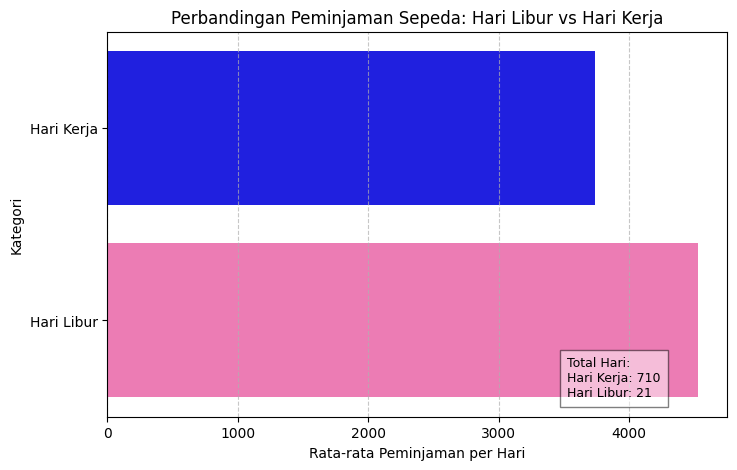

In [16]:
# Hitung total peminjaman dan jumlah hari berdasarkan kategori libur
Totpmjmn = day_df.groupby('holiday')["cnt"].sum()
Thari = day_df["holiday"].value_counts()
Mean= Totpmjmn / Thari

# Buat DataFrame untuk visualisasi
data = pd.DataFrame({
    "Kategori": ["Hari Kerja", "Hari Libur"],
    "Total Peminjaman": Totpmjmn.values,
    "Total Hari": Thari.values,
    "Rata-rata Peminjaman per Hari": Mean.values
})

# Membuat Plot diagram
plt.figure(figsize=(8, 5))
sns.barplot(y=data["Kategori"], x=data["Rata-rata Peminjaman per Hari"],
            palette=["blue", "hotpink"])

# Styling
plt.xlabel("Rata-rata Peminjaman per Hari")
plt.ylabel("Kategori")
plt.title("Perbandingan Peminjaman Sepeda: Hari Libur vs Hari Kerja", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menambahkan Teks
info_text = f"Total Hari:\nHari Kerja: {Thari[0]}\nHari Libur: {Thari[1]}"
plt.figtext(0.7, 0.15, info_text, fontsize=9, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

plt.show()


###Insight
Data terbanyak ada pada hari libur

- **Pertanyaan 2**: - Pengaruh musim dan cuaca pada peminjaman sepeda

In [17]:
day_df.groupby(by = "season").agg({
    "cnt" : "sum",
})

,cnt
season,
musim dingin,841613
musim gugur,1061129
musim panas,918589
musim semi,471348


<ipython-input-18-46a622e77e74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats.index.astype(str), y=stats["mean"], palette="winter")


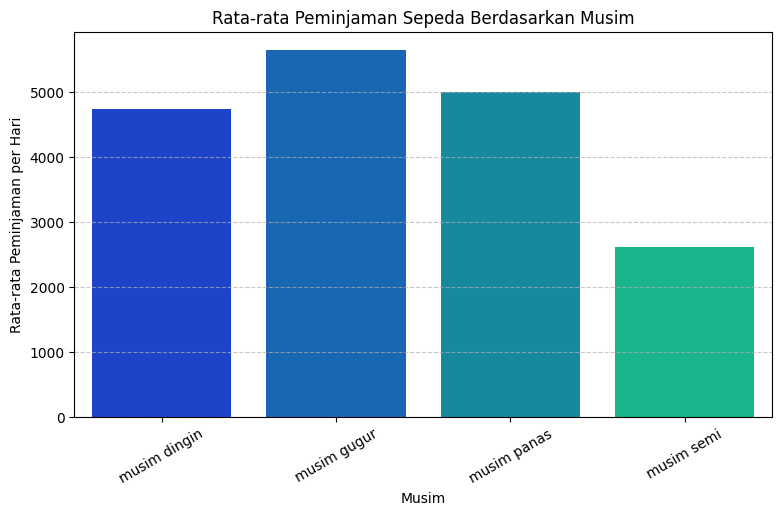

In [18]:
# Menghitung statistik peminjaman berdasarkan musim
stats = day_df.groupby("season")["cnt"].agg(total="sum",
                                            jmlhari="count", mean="mean").round(2)
# Membuat plot diagram
plt.figure(figsize=(9, 5))
sns.barplot(x=stats.index.astype(str), y=stats["mean"], palette="winter")

# Styling
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman per Hari")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

###Insight
Data terbanyak ada pada musim gugur

##Conclusion
- Pertanyaan 1: Peminjaman sepeda cenderung lebih tinggi pada hari libur dibandingkan dengan hari kerja, yang mengindikasikan bahwa sepeda lebih sering dimanfaatkan untuk kegiatan rekreasi saat liburan. Walaupun jumlah hari kerja lebih banyak, rata-rata penggunaan harian tetap lebih besar pada hari libur. Kondisi ini dapat dimanfaatkan oleh penyedia layanan untuk mengoptimalkan operasional, misalnya dengan menambah jumlah sepeda atau memberikan penawaran khusus pada akhir pekan dan hari libur.

- Pertanyaan 2: Peminjaman sepeda bervariasi menurut musim, dengan angka tertinggi pada musim gugur dan panas, kemungkinan karena cuaca yang lebih mendukung aktivitas luar ruangan. Musim dingin masih memiliki peminjaman yang cukup tinggi, meskipun suhu rendah bisa menjadi tantangan. Sementara itu, musim semi mencatat peminjaman terendah, mungkin akibat cuaca yang tidak stabil. Pola ini dapat dimanfaatkan untuk strategi operasional, seperti meningkatkan promosi atau menyesuaikan ketersediaan sepeda sesuai musim.

In [19]:
day_df.to_csv("DataBaru.csv", index=False)